In [1]:
%matplotlib inline
import boto3
import botocore
import datetime
import matplotlib.pyplot as plt
import os.path
import os
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
era5_bucket = 'era5-pds'

# AWS access / secret keys required
# s3 = boto3.resource('s3')
# bucket = s3.Bucket(era5_bucket)

# No AWS keys required
client = boto3.client('s3', config=botocore.client.Config(signature_version=botocore.UNSIGNED))

keys = []
date = datetime.date(2021,1,1) # update to desired date
prefix = date.strftime('%Y/%m/')

response = client.list_objects_v2(Bucket=era5_bucket, Prefix=prefix)
response_meta = response.get('ResponseMetadata')

data = xr.Dataset()
if response_meta.get('HTTPStatusCode') == 200:
    contents = response.get('Contents')
    if contents == None:
        print("No objects are available for %s" % date.strftime('%B, %Y'))
    else:
        for obj in contents:
            keys.append(obj.get('Key'))
        print("There are %s objects available for %s\n--" % (len(keys), date.strftime('%B, %Y')))
        for k in keys:
            print(k)
else:
    print("There was an error with your request.")

There are 19 objects available for January, 2021
--
2021/01/data/air_pressure_at_mean_sea_level.nc
2021/01/data/air_temperature_at_2_metres.nc
2021/01/data/air_temperature_at_2_metres_1hour_Maximum.nc
2021/01/data/air_temperature_at_2_metres_1hour_Minimum.nc
2021/01/data/dew_point_temperature_at_2_metres.nc
2021/01/data/eastward_wind_at_100_metres.nc
2021/01/data/eastward_wind_at_10_metres.nc
2021/01/data/integral_wrt_time_of_surface_direct_downwelling_shortwave_flux_in_air_1hour_Accumulation.nc
2021/01/data/lwe_thickness_of_surface_snow_amount.nc
2021/01/data/northward_wind_at_100_metres.nc
2021/01/data/northward_wind_at_10_metres.nc
2021/01/data/precipitation_amount_1hour_Accumulation.nc
2021/01/data/sea_surface_temperature.nc
2021/01/data/sea_surface_wave_from_direction.nc
2021/01/data/sea_surface_wave_mean_period.nc
2021/01/data/significant_height_of_wind_and_swell_waves.nc
2021/01/data/snow_density.nc
2021/01/data/surface_air_pressure.nc
2021/01/main.nc


In [3]:
var = 'sea_surface_wave_from_direction'

In [4]:
s3_data_ptrn = '{year}/{month}/data/{var}.nc'
data_file_ptrn = 'era5/{year}{month}_{var}.nc'



In [5]:
date= datetime.date(2017, 8, 1)

year = date.strftime('%Y')
month = date.strftime('%m')
s3_data_key = s3_data_ptrn.format(year=year, month=month, var=var)
data_file = data_file_ptrn.format(year=year, month=month, var=var)

if not os.path.isfile(data_file): # check if file already exists
    print("Downloading %s from S3..." % s3_data_key)
    client.download_file(era5_bucket, s3_data_key, data_file)

ds = xr.open_dataset(data_file)
ds.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:                          (lon_ocean: 720, lat_ocean: 361, time0: 744)
Coordinates:
  * lon_ocean                        (lon_ocean) float32 0.0 0.5 ... 359.0 359.5
  * lat_ocean                        (lat_ocean) float32 90.0 89.5 ... -90.0
  * time0                            (time0) datetime64[ns] 2017-08-01 ... 20...
Data variables:
    sea_surface_wave_from_direction  (time0, lat_ocean, lon_ocean) float32 ...
Attributes:
    source:       Reanalysis
    institution:  ECMWF
    title:        ERA5 forecasts>

In [6]:
ds

<xarray.Dataset>
Dimensions:                          (lon_ocean: 720, lat_ocean: 361, time0: 744)
Coordinates:
  * lon_ocean                        (lon_ocean) float32 0.0 0.5 ... 359.0 359.5
  * lat_ocean                        (lat_ocean) float32 90.0 89.5 ... -90.0
  * time0                            (time0) datetime64[ns] 2017-08-01 ... 20...
Data variables:
    sea_surface_wave_from_direction  (time0, lat_ocean, lon_ocean) float32 ...
Attributes:
    source:       Reanalysis
    institution:  ECMWF
    title:        ERA5 forecasts

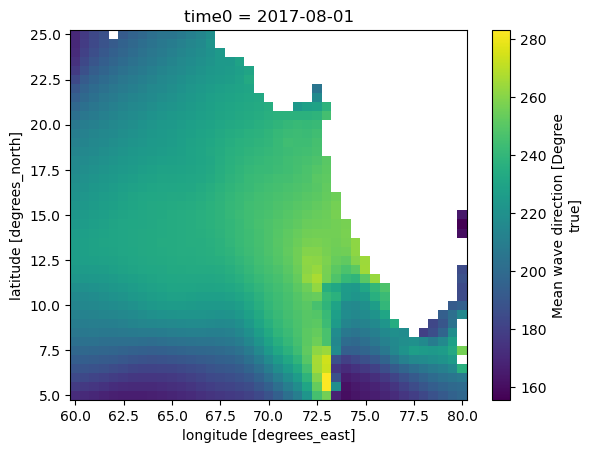

In [10]:
ds['sea_surface_wave_from_direction'].isel(time0=0).sel(lon_ocean=slice(60, 80), lat_ocean=slice(25, 5)).plot.imshow()